<a href="https://colab.research.google.com/github/lompas10/DS-Tinkoff-Challenge-2k17/blob/main/Best_Tinkoff_clients_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://zoogen.org/images/rus/images/logo/tinkoff.jpg' width=1050 height = 500 >


---


<p align="center">
<font size=11>
<font face='Cooper black' color='Pink'>Pet-project. Prediction of the client's choice of Tinkoff bank for obtaining a loan</p>


---





<font color='yellow' size = 6>Target: To classify clients according to the choice of Tinkoff Bank clients for obtaining a loan.





---
<font size=6 color = 'violet' face='Cooper black'> Author: Pavel Lomovtsev, Junior Data Scientist, *@lompas10*
---






---



In [73]:
import pandas as pd #reading and dataframes
import numpy as np #stats


import seaborn as sns #visualization
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split #ML
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve, precision_recall_fscore_support, recall_score, roc_auc_score, precision_score, plot_precision_recall_curve, auc
import xgboost

from scipy.stats import pearsonr
import scipy

import warnings
warnings.filterwarnings('ignore')

np.random.seed(17)

<font color='Red' size=7> 1.Data reading and preprocessing, normalizing.

In [102]:
train = pd.read_csv('credit_train.csv', sep='\t', encoding='windows-1251', decimal=',')
test = pd.read_csv('credit_test.csv', sep='\t', encoding='windows-1251', decimal=',')

In [5]:
train.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,living_region_code,open_account_flg
0,1,M,48,MAR,UMN,59998.00,10,1.6,0.770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000,1,1,23,0
1,2,F,28,MAR,UMN,10889.00,6,1.1,0.248514,GRD,МОСКВА,43000,2,0,77,0
2,3,M,32,MAR,SPC,10728.00,12,1.1,0.459589,SCH,ОБЛ САРАТОВСКАЯ,23000,5,0,64,0
3,4,F,27,DIV,SPC,12009.09,12,1.1,0.362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000,2,0,34,0
4,5,M,45,MAR,SPC,16908.89,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000,1,0,74,0


In [6]:
train.dtypes

client_id                 int64
gender                   object
age                       int64
marital_status           object
job_position             object
credit_sum              float64
credit_month              int64
tariff_id                object
score_shk               float64
education                object
living_region            object
monthly_income            int64
credit_count             object
overdue_credit_count     object
living_region_code        int64
open_account_flg          int64
dtype: object

In [7]:
train = train.drop(['living_region', 'client_id'], axis=1)

In [8]:
def unique_object_values(data):
  for column in data.select_dtypes(include=['object']).columns:
    print(column, data[column].unique(), end='\n\n')

unique_object_values(train)

gender ['M' 'F']

marital_status ['MAR' 'DIV' 'UNM' 'WID' 'CIV']

job_position ['UMN' 'SPC' 'INP' 'DIR' 'ATP' 'PNA' 'BIS' 'WOI' 'NOR' 'WRK' 'WRP' 'PNV'
 'BIU' 'PNI' 'HSK' 'PNS' 'INV' 'ONB']

tariff_id ['1.6' '1.1' '1.5' '1' '1.32' '1.4' '1.7' '1.3' '1.16' '1.9' '1.22' '1.23'
 '1.43' '1.44' '1.19' '1.2' '1.21' '1.24' '1.91' '1.41' '1.17' '1.94'
 '1.25' '1.48' '1.52' '1.18' '1.26' '1.27' '1.28' '1.96' '1.56' '1.29']

education ['GRD' 'SCH' 'UGR' 'PGR' 'ACD']

credit_count ['1' '2' '5' '0' '3' '7' '4' '6' '?' '8' '10' '9' '12' '11' '14' '15' '13'
 '16' '19' '17' '18' '21']

overdue_credit_count ['1' '0' '?' '2' '3']



In [103]:
train = train.drop(train[train.credit_count == '?'].index)
train = train.drop(train[train.overdue_credit_count == '?'].index)

test = test.drop(test[test.credit_count == '?'].index)
test = test.drop(test[test.overdue_credit_count == '?'].index)

In [10]:
unique_object_values(train)

gender ['M' 'F']

marital_status ['MAR' 'DIV' 'UNM' 'WID' 'CIV']

job_position ['UMN' 'SPC' 'INP' 'DIR' 'ATP' 'PNA' 'BIS' 'WOI' 'NOR' 'WRK' 'WRP' 'PNV'
 'BIU' 'PNI' 'HSK' 'PNS' 'INV']

tariff_id ['1.6' '1.1' '1.5' '1' '1.32' '1.4' '1.7' '1.3' '1.16' '1.9' '1.23' '1.43'
 '1.44' '1.19' '1.2' '1.21' '1.22' '1.24' '1.91' '1.41' '1.17' '1.94'
 '1.25' '1.48' '1.52' '1.18' '1.26' '1.27' '1.28' '1.96' '1.56' '1.29']

education ['GRD' 'SCH' 'UGR' 'PGR' 'ACD']

credit_count ['1' '2' '5' '0' '3' '7' '4' '6' '8' '10' '9' '12' '11' '14' '15' '13'
 '16' '19' '17' '18' '21']

overdue_credit_count ['1' '0' '2' '3']



In [11]:
X, y = train.drop('open_account_flg', axis=1), train['open_account_flg']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y)

y_train.value_counts()

0    94436
1    18625
Name: open_account_flg, dtype: int64

In [12]:
X_train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,living_region_code
39802,M,29,MAR,SPC,38107.0,10,1.91,0.536378,SCH,80000,1,0,14
128292,F,43,DIV,UMN,27647.0,12,1.43,0.640040,GRD,23000,3,1,23
117287,F,27,UNM,SPC,16990.0,6,1.5,0.408648,GRD,17000,1,0,3
122577,F,31,UNM,SPC,35990.0,8,1.4,0.344109,GRD,80000,1,0,77
93650,F,33,DIV,SPC,10931.0,12,1.6,0.339772,GRD,50000,2,0,50


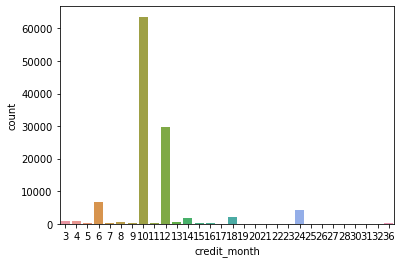

In [13]:
sns.countplot(X_train['credit_month']);

In [14]:
X_train.credit_month.value_counts().head()

10    63562
12    29685
6      6823
24     4170
18     1970
Name: credit_month, dtype: int64

In [15]:
X_train.isna().sum(), X_valid.isna().sum()

(gender                  0
 age                     0
 marital_status          0
 job_position            0
 credit_sum              0
 credit_month            0
 tariff_id               0
 score_shk               0
 education               0
 monthly_income          0
 credit_count            0
 overdue_credit_count    0
 living_region_code      0
 dtype: int64, gender                  0
 age                     0
 marital_status          0
 job_position            0
 credit_sum              0
 credit_month            0
 tariff_id               0
 score_shk               0
 education               0
 monthly_income          0
 credit_count            0
 overdue_credit_count    0
 living_region_code      0
 dtype: int64)

In [16]:
def month_sum(sum, month):
  return sum / month

In [17]:
X_train['month_sum'], X_valid['month_sum'] = month_sum(X_train['credit_sum'], X_train.credit_month), month_sum(X_valid['credit_sum'], X_valid.credit_month)

In [18]:
X_train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,living_region_code,month_sum
39802,M,29,MAR,SPC,38107.0,10,1.91,0.536378,SCH,80000,1,0,14,3810.700000
128292,F,43,DIV,UMN,27647.0,12,1.43,0.640040,GRD,23000,3,1,23,2303.916667
117287,F,27,UNM,SPC,16990.0,6,1.5,0.408648,GRD,17000,1,0,3,2831.666667
122577,F,31,UNM,SPC,35990.0,8,1.4,0.344109,GRD,80000,1,0,77,4498.750000
93650,F,33,DIV,SPC,10931.0,12,1.6,0.339772,GRD,50000,2,0,50,910.916667


In [19]:
X_valid.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,living_region_code,month_sum
13699,M,27,UNM,SPC,23829.0,10,1.5,0.549970,UGR,30000,3,0,2,2382.90
80820,F,31,MAR,SPC,42488.0,10,1.1,0.442968,GRD,30000,2,0,63,4248.80
62634,M,23,UNM,UMN,53189.0,10,1.6,0.515253,SCH,37000,1,0,78,5318.90
124305,F,34,UNM,SPC,57789.0,10,1.6,0.634904,SCH,73000,1,0,77,5778.90
144822,F,26,UNM,SPC,15879.0,12,1.1,0.376085,GRD,40000,1,0,46,1323.25


In [20]:
def encoding_categories(data):
  encoder = LabelEncoder()
  categories = data.select_dtypes('object')
  for category in categories:
    data[category] = encoder.fit_transform(data[category])
  return data

In [21]:
encoding_categories(X_train).head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,living_region_code,month_sum
39802,1,29,2,12,38107.0,10,29,0.536378,3,80000,1,0,14,3810.700000
128292,0,43,1,13,27647.0,12,20,0.640040,1,23000,14,1,23,2303.916667
117287,0,27,3,12,16990.0,6,23,0.408648,1,17000,1,0,3,2831.666667
122577,0,31,3,12,35990.0,8,18,0.344109,1,80000,1,0,77,4498.750000
93650,0,33,1,12,10931.0,12,26,0.339772,1,50000,12,0,50,910.916667


In [22]:
encoding_categories(X_valid).head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,living_region_code,month_sum
13699,1,27,3,12,23829.0,10,21,0.549970,4,30000,11,0,2,2382.90
80820,0,31,2,12,42488.0,10,1,0.442968,1,30000,10,0,63,4248.80
62634,1,23,3,13,53189.0,10,23,0.515253,3,37000,1,0,78,5318.90
124305,0,34,3,12,57789.0,10,23,0.634904,3,73000,1,0,77,5778.90
144822,0,26,3,12,15879.0,12,1,0.376085,1,40000,1,0,46,1323.25


In [23]:
pearsonr(X_train.overdue_credit_count, y_train)

(0.02548058555526965, 1.0436281507292658e-17)

In [24]:
X_train.drop('overdue_credit_count', axis=1, inplace=True), X_valid.drop('overdue_credit_count', axis=1, inplace=True)

(None, None)

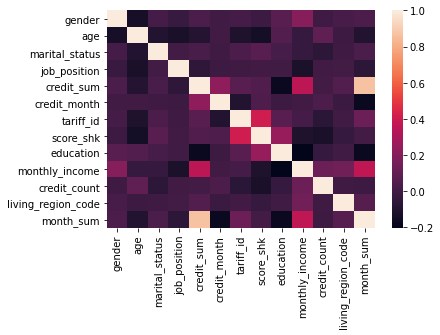

In [25]:
sns.heatmap(X_train.corr());

<font size=7 color='Red'> 2.Construction of models.

In [26]:
scaler = StandardScaler()

In [27]:
X_train.loc[:, ['age', 'credit_sum', 'tariff_id', 'score_shk', 'month_sum', 'monthly_income']], X_valid.loc[:,['age', 'credit_sum', 'tariff_id', 'score_shk', 'month_sum', 'monthly_income']] = scaler.fit_transform(X_train.loc[:, ['age', 'credit_sum', 'tariff_id', 'score_shk', 'month_sum', 'monthly_income']]), scaler.transform(X_valid.loc[:, ['age', 'credit_sum', 'tariff_id', 'score_shk', 'month_sum', 'monthly_income']])

In [28]:
params_lr = {'C' : [0.0001, 0.001, 0.01, 0.1, 1]}

lr = LogisticRegression(random_state=17)

lr_best = GridSearchCV(lr, params_lr, scoring='roc_auc', verbose=True, n_jobs=-1, cv=5).fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   22.9s finished


In [29]:
print(classification_report(y_valid, lr_best.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     40473
           1       0.00      0.00      0.00      7982

    accuracy                           0.84     48455
   macro avg       0.42      0.50      0.46     48455
weighted avg       0.70      0.84      0.76     48455



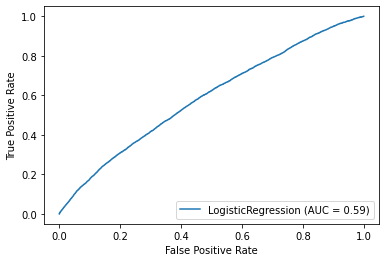

In [30]:
plot_roc_curve(lr_best, X_valid, y_valid);

In [31]:
sgd = SGDClassifier()

sgd_params = {'alpha' : [0.00001, 0.0001, 0.001, 0.01, 0.1],
              'max_iter' : [10, 15, 25, 50]}

best_sgd = GridSearchCV(sgd, param_grid=sgd_params, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5).fit(X_train, y_train).best_estimator_

print(classification_report(y_valid, best_sgd.predict(X_valid)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.7s finished


              precision    recall  f1-score   support

           0       0.84      1.00      0.91     40473
           1       0.00      0.00      0.00      7982

    accuracy                           0.84     48455
   macro avg       0.42      0.50      0.46     48455
weighted avg       0.70      0.84      0.76     48455



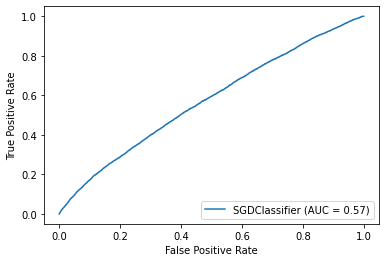

In [32]:
plot_roc_curve(best_sgd, X_valid, y_valid);

In [33]:
rf = RandomForestClassifier()

params_rf = {'n_estimators' : [100, 150],
             'max_depth' : [5, 10, 15, 20, 30]}

best_rf = GridSearchCV(rf, params_rf, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5).fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.8min finished


In [34]:
print(classification_report(y_valid, best_rf.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     40473
           1       0.40      0.02      0.04      7982

    accuracy                           0.83     48455
   macro avg       0.62      0.51      0.47     48455
weighted avg       0.77      0.83      0.77     48455



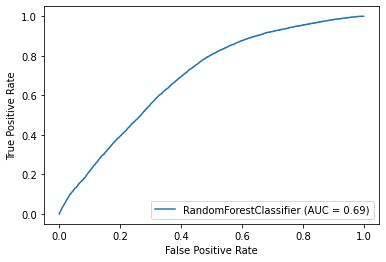

In [35]:
plot_roc_curve(best_rf, X_valid, y_valid);

In [36]:
tree = DecisionTreeClassifier()

params_tree = {'max_depth' : [5, 10, 15],
               'min_samples_split' : [5, 10, 20, 50]}

best_tree = GridSearchCV(tree, params_tree, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').fit(X_train, y_train).best_estimator_

print(classification_report(y_valid, best_tree.predict(X_valid)))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   23.1s finished


              precision    recall  f1-score   support

           0       0.84      0.97      0.90     40473
           1       0.32      0.07      0.11      7982

    accuracy                           0.82     48455
   macro avg       0.58      0.52      0.51     48455
weighted avg       0.76      0.82      0.77     48455



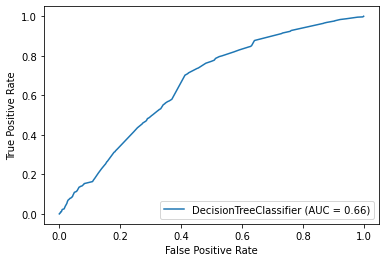

In [37]:
plot_roc_curve(best_tree, X_valid, y_valid);

In [38]:
bag = BaggingClassifier()

params_bag = {'base_estimator' : [lr_best, best_tree, best_sgd],
              'n_estimators' : [10, 25, 50, 100]}

best_bag = GridSearchCV(bag, params_bag, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').fit(X_train, y_train).best_estimator_

print(classification_report(y_valid, best_bag.predict(X_valid)))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 20.3min finished


              precision    recall  f1-score   support

           0       0.84      0.99      0.91     40473
           1       0.29      0.03      0.05      7982

    accuracy                           0.83     48455
   macro avg       0.56      0.51      0.48     48455
weighted avg       0.75      0.83      0.77     48455



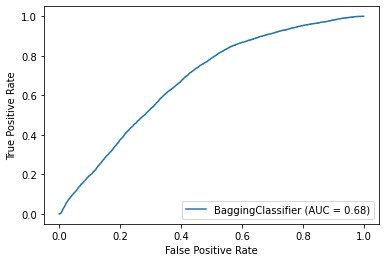

In [39]:
plot_roc_curve(best_bag, X_valid, y_valid);

In [40]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors' : np.arange(10),
              'metric' : ['euclidean', 'minkowski']}

best_knn = GridSearchCV(knn, params_knn, cv=5, verbose=1, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train).best_estimator_

print(classification_report(y_valid, best_knn.predict(X_valid)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.1min finished


              precision    recall  f1-score   support

           0       0.84      0.98      0.90     40473
           1       0.32      0.05      0.08      7982

    accuracy                           0.83     48455
   macro avg       0.58      0.51      0.49     48455
weighted avg       0.75      0.83      0.77     48455



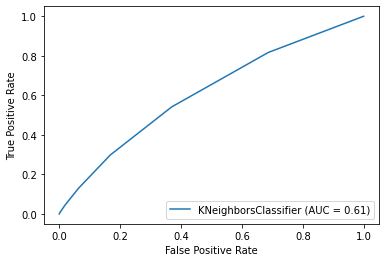

In [41]:
plot_roc_curve(best_knn, X_valid, y_valid);

In [42]:
xgb = xgboost.XGBClassifier()

params_xgb = {'max_depth' : [3, 5, 10, 15]}

best_xgb = GridSearchCV(xgb, params_xgb, cv=5, verbose=1, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train).best_estimator_

print(classification_report(y_valid, best_xgb.predict(X_valid)))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished


              precision    recall  f1-score   support

           0       0.84      0.98      0.91     40473
           1       0.33      0.04      0.07      7982

    accuracy                           0.83     48455
   macro avg       0.59      0.51      0.49     48455
weighted avg       0.76      0.83      0.77     48455



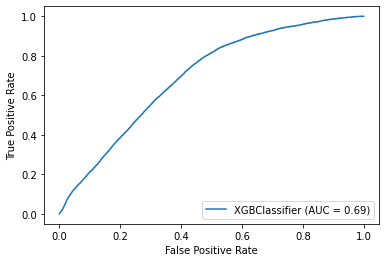

In [43]:
plot_roc_curve(best_xgb, X_valid, y_valid)

<font color='Red' size=7> 3.Choosing the best model for prediction.

In [75]:
best_models = [lr_best, best_sgd, best_knn, best_tree, best_rf, best_bag, best_xgb]

MODEL_NAMES = ['LogisticRegression', 'SGD', 'KNN', 'Decision tree', 'Random forest', 'Bagging clsfr', 'XGBoost']

scores_dict = {}

for i in range(len(best_models)):
  print(f'{MODEL_NAMES[i]}, \tRoc_auc: ' +  str(roc_auc_score(y_valid, best_models[i].predict(X_valid))))
  scores_dict[MODEL_NAMES[i]] = roc_auc_score(y_valid, best_models[i].predict(X_valid))

LogisticRegression, 	Roc_auc: 0.49998764608504437
SGD, 	Roc_auc: 0.5
KNN, 	Roc_auc: 0.5133566575619148
Decision tree, 	Roc_auc: 0.5202587412491735
Random forest, 	Roc_auc: 0.5070443858675101
Bagging clsfr, 	Roc_auc: 0.5076435708632417
XGBoost, 	Roc_auc: 0.5116084037031335


In [76]:
print(max(scores_dict, key=scores_dict.get))

Decision tree


<font color='Green' size=7> The best model for this task is Decision tree.

<font size=7 color='Red'> 4. Submission

In [104]:
test.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,living_region_code
0,170747,F,48,MAR,UMN,16558.00,10,1.1,0.370409,GRD,ХАКАСИЯ РЕСП,34000,2,0,19
1,170748,M,29,MAR,SPC,7028.72,6,1.4,0.377281,SCH,ОБЛ КЕМЕРОВСКАЯ,19000,3,0,42
2,170749,F,20,UNM,SPC,13019.00,10,1.6,0.538515,SCH,ОБЛ БЕЛГОРОДСКАЯ,25000,1,0,31
3,170750,F,41,MAR,SPC,9379.00,10,1.1,0.482520,GRD,ОБЛ ИРКУТСКАЯ,30000,0,0,38
4,170751,F,31,MAR,SPC,13990.00,6,1.43,0.485914,GRD,ОБЛ КИРОВСКАЯ,20000,2,0,43


In [105]:
client_id = test.client_id

In [106]:
test = test.drop(['living_region', 'overdue_credit_count', 'living_region_code'], axis=1)

In [107]:
test['month_sum'] = month_sum(test['credit_sum'],test['credit_month'])

In [108]:
encoding_categories(test)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,month_sum
0,170747,0,48,2,14,16558.00,10,1,0.370409,1,34000,10,1655.800000
1,170748,1,29,2,13,7028.72,6,19,0.377281,3,19000,12,1171.453333
2,170749,0,20,3,13,13019.00,10,26,0.538515,3,25000,1,1301.900000
3,170750,0,41,2,13,9379.00,10,1,0.482520,1,30000,0,937.900000
4,170751,0,31,2,13,13990.00,6,21,0.485914,1,20000,10,2331.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91934,262681,1,39,2,13,18168.00,12,1,0.564620,3,30000,10,1514.000000
91935,262682,1,41,2,13,10114.00,12,28,0.347262,3,30000,1,842.833333
91936,262683,1,33,3,13,14807.00,6,26,0.404430,3,30000,0,2467.833333
91937,262684,0,25,2,13,19718.00,10,19,0.341982,1,20000,1,1971.800000


In [109]:
submission = pd.DataFrame({'client_id' : client_id,
                           'prediction' : best_tree.predict(test)})

In [110]:
submission.head()

,client_id,prediction
0,170747,0
1,170748,1
2,170749,1
3,170750,0
4,170751,1


In [111]:
submission = submission.to_csv('submission.csv')